##**Experiment No-6**

##**AIM: Implement the decision tree algorithm. Use an appropriate data set for building the decision tree and apply this knowledge to classify a new sample**

##**Theory**

**Decision Tree** 

Decision trees can be used for classification as well as regression problems. The name itself suggests that it uses a flowchart like a tree structure to show the predictions that result from a series of feature-based splits. It starts with a root node and ends with a decision made by leaves.

**Terminologies used in decision trees**

**Root Nodes** – It is the node present at the beginning of a decision tree from this node the population starts dividing according to various features.

**Decision Nodes** – The nodes we get after splitting the root nodes are called Decision Node

**Leaf Nodes** – The nodes where further splitting is not possible are called leaf nodes or terminal nodes

**Sub-tree** – Just like a small portion of a graph is called sub-graph similarly a sub-section of this decision tree is called sub-tree.

**Pruning** – It is nothing but cutting down some nodes to stop overfitting.

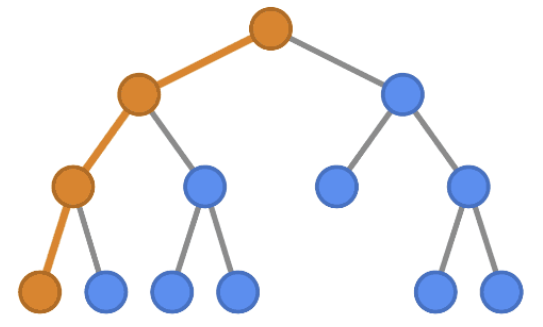

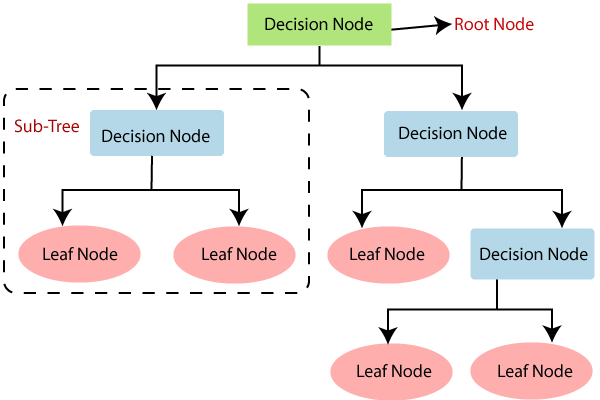

**Working of Decision Tree algorithm**

In a decision tree, for predicting the class of the given dataset, the algorithm starts from the root node of the tree. This algorithm compares the values of root attribute with the record (real dataset) attribute and, based on the comparison, follows the branch and jumps to the next node.

For the next node, the algorithm again compares the attribute value with the other sub-nodes and move further. It continues the process until it reaches the leaf node of the tree. The complete process can be better understood using the below algorithm:

Step-1: Begin the tree with the root node, which contains the complete dataset.

Step-2: Find the best attribute in the dataset using Attribute Selection Measure (ASM).

Step-3: Divide the Real-dataset into subsets that contains possible values for the best attributes.

Step-4: Generate the decision tree node, which contains the best attribute.

Step-5: Recursively make new decision trees using the subsets of the dataset created in step -3. Continue this process until a stage is reached where you cannot further classify the nodes and called the final node as a leaf node.

**Attribute Selection Measures**

While implementing a Decision tree, the main issue arises that how to select the best attribute for the root node and for sub-nodes. So, to solve such problems there is a technique which is called as Attribute selection measure or ASM. By this measurement, we can easily select the best attribute for the nodes of the tree. 

There are two popular techniques for ASM, which are:


**Information Gain**

**Gini Index**

While using Information gain as a criterion, we assume attributes to be categorical and for Gini index attributes are assumed to be continuous. These attribute selection measures are described below.

**1. Information Gain:**
Information gain is the measurement of changes in entropy after the segmentation of a dataset based on an attribute.
It calculates how much information a feature provides us about a class.
According to the value of information gain, we split the node and build the decision tree.
A decision tree algorithm always tries to maximize the value of information gain, and a node/attribute having the highest information gain is split first. 

It can be calculated using the below formula:

**Information Gain= Entropy(S)- [(Weighted Avg) * Entropy(each feature)]**

**Entropy:** 
Entropy is a metric to measure the impurity in a given attribute. It specifies randomness in data. 

Entropy can be calculated as:


**Entropy(s)= -P(yes)log2 P(yes)- P(no) log2 P(no)**

Where,

S= Total number of samples

P(yes)= probability of yes

P(no)= probability of no

**2. Gini Index:**

Gini index is a measure of impurity or purity used while creating a decision tree in the CART (Classification and Regression Tree) algorithm.

An attribute with the low Gini index should be preferred as compared to the high Gini index.

It only creates binary splits, and the CART algorithm uses the Gini index to create binary splits.

Gini index can be calculated using the below formula:

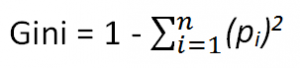

**Pruning: Getting an Optimal Decision tree**

Pruning is a process of deleting the unnecessary nodes from a tree in order to get the optimal decision tree.

A too-large tree increases the risk of overfitting, and a small tree may not capture all the important features of the dataset. Therefore, a technique that decreases the size of the learning tree without reducing accuracy is known as Pruning. 

There are mainly two types of tree pruning technology used:

**Cost Complexity Pruning**

**Reduced Error Pruning.**

**Advantages of the Decision Tree**

It is simple to understand as it follows the same process which a human follow 

While making any decision in real-life.

It can be very useful for solving decision-related problems.

It helps to think about all the possible outcomes for a problem.

There is less requirement of data cleaning compared to other algorithms.

**Disadvantages of the Decision Tree**

The decision tree contains lots of layers, which makes it complex.

It may have an overfitting issue, which can be resolved using the Random Forest algorithm.

For more class labels, the computational complexity of the decision tree may increase.

##**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Load the dataset**

In [ ]:
from sklearn import datasets
df=pd.read_csv('/DT_dataset.csv')

In [ ]:
df

##**Drop null values columns and ID columns**

In [ ]:
df.drop(columns=['id','Unnamed: 32'],axis=1,inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder     
label_encoder = LabelEncoder()
df['diagnosis']= label_encoder.fit_transform(df['diagnosis']) 
df

##**Split data into input fearures and target variable**

In [ ]:
X=df.drop('diagnosis',axis=1)
y=df['diagnosis']

##**Split the data using Train-test split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##**Import Decision Tree classifier model and create instance**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=42)

##**Create grid parameters for hyperparameter tuning**

In [ ]:
params =  {'min_samples_leaf': [1, 2, 3, 4, 5], 
           'max_depth': [1, 2, 3, 4, 5],
           'criterion':['gini', 'entropy'],
           'random_state': [1, 2, 3, 4, 5,6,7,8,9,10]}


##**Create gridsearch instance**

In [ ]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=dtc,
                    param_grid=params,
                    cv=10,
                    n_jobs=1,verbose=2)

##**Fit the model**

In [ ]:
grid.fit(X_train, y_train)

##**Assess the best score**


In [ ]:
grid.best_score_, grid.best_params_

In [ ]:
dtree = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_split=3,random_state=42)

In [ ]:
dtree.fit(X_train,y_train)

In [ ]:
predictions = dtree.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

In [ ]:
print(confusion_matrix(y_test,predictions))

##**TASK**
1. Import DT_task_dataset
2. Split data into training and testing
3. Import Decision tree classifier
4. Create grid parameters for hyperparameter tuning 
5. Create gridsearch instance
7. Find best paramenters by gridsearch approach
8. Generate the classification report and the confusion matrix

In [4]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [5]:
dz=pd.read_csv("/content/drive/MyDrive/AIR_LAB_DATASETS/DT_task_dataset - DT_task_dataset.csv")
dz

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
dz.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
X=dz.drop("Outcome",axis=1)
y=dz['Outcome']

In [8]:
from sklearn.model_selection import train_test_split
X_train ,X_test ,y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [9]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=42 )

In [10]:
from logging import log
params={'min_samples_leaf':[1,2,3],
        'max_depth':[1,2,3],
        'criterion':['gini','entropy','log_loss'],
        'random_state': range(0,50),'min_samples_split': [1,2]
        }

In [11]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(estimator=dtc,
                  param_grid=params,
                  cv=10,n_jobs=1,verbose=2)

In [12]:
grid.fit(X_train,y_train)

Streaming output truncated to the last 5000 lines.
[CV] END criterion=log_loss, max_depth=2, min_samples_leaf=2, min_samples_split=1, random_state=0; total time=   0.0s
[CV] END criterion=log_loss, max_depth=2, min_samples_leaf=2, min_samples_split=1, random_state=0; total time=   0.0s
[CV] END criterion=log_loss, max_depth=2, min_samples_leaf=2, min_samples_split=1, random_state=0; total time=   0.0s
[CV] END criterion=log_loss, max_depth=2, min_samples_leaf=2, min_samples_split=1, random_state=0; total time=   0.0s
[CV] END criterion=log_loss, max_depth=2, min_samples_leaf=2, min_samples_split=1, random_state=0; total time=   0.0s
[CV] END criterion=log_loss, max_depth=2, min_samples_leaf=2, min_samples_split=1, random_state=0; total time=   0.0s
[CV] END criterion=log_loss, max_depth=2, min_samples_leaf=2, min_samples_split=1, random_state=0; total time=   0.0s
[CV] END criterion=log_loss, max_depth=2, min_samples_leaf=2, min_samples_split=1, random_state=0; total time=   0.0s
[CV] 

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
13500 fits failed out of a total of 27000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
13500 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 600, in _val

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2],
                         'random_state': range(0, 50)},
             verbose=2)

In [13]:
grid.best_score_, grid.best_params_

(0.7492596509783184,
 {'criterion': 'entropy',
  'max_depth': 3,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'random_state': 0})

In [17]:
dtree=DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_leaf=2, min_samples_split=2,random_state=0)
dtree.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=2,
                       random_state=0)

In [18]:
pred=dtree.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report


In [19]:
print(confusion_matrix(y_test,pred))

[[83 16]
 [20 35]]
